In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
my_red = "#f53b3b" # red
my_blue = "#4287f5" # blue

In [87]:
spins = [-1, + 1]


def different_states_indicator(a, b):
    value = (1 - a * b)/2
    return value # 1 = different states, 0 = same state
    
def rho(G, state):
    count = 0
    for edge in list(G.edges()):
        start_node = edge[0]
        end_node = edge[1]
        count += different_states_indicator(state[start_node], state[end_node])
    return count/G.size()

def initial_state(G):
    states = []
    for node in G.nodes:
        states.append(random.choice(spins))
    return states

# ASYNCRONOUS UPDATE: one time step corresponds to 
# updating a number of nodes equal to the network size,
#  N, so that on average (!) every node is updated once
def evolution_step(G, state):
    N = G.number_of_nodes()
    for n in range(N):
        selected_node = random.choice(range(N))
        if G.degree(selected_node) > 0:
            selected_neighbour = random.choice(list(G.neighbors(selected_node)))
            state[selected_node] = state[selected_neighbour]
    return state


# define a Barabasi-Albert graph with node indices sorted by degree in descending order (hubs first)
def ba_graph(num_nodes = 100, mean_degree = 10):
    m = int(mean_degree / 2)
    ba_graph = nx.barabasi_albert_graph(num_nodes, m)
    degrees = dict(ba_graph.degree())
    sorted_indices = sorted(degrees, key=degrees.get, reverse=True)
    new_indices = {old_idx: new_idx for new_idx, old_idx in enumerate(sorted_indices)}
    reindexed_edges = [(new_indices[edge[0]], new_indices[edge[1]]) for edge in ba_graph.edges()]
    reindexed_graph = nx.Graph()
    reindexed_graph.add_edges_from(reindexed_edges) 
    return reindexed_graph
def voter_graph_plot(graph, states):
    colors = []
    for n in range(graph.number_of_nodes()):
        if states[n] == +1:
            colors.append(my_red)
        else:
            colors.append(my_blue)
    nx.draw_spring(graph, node_color = colors)

Text(0, 0.5, 'Node Degree')

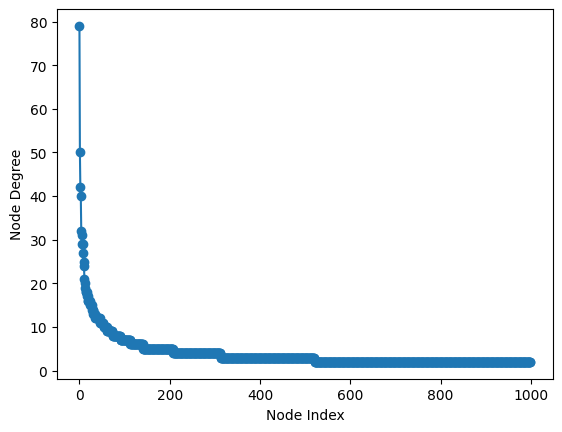

In [90]:
num_nodes = 1000
mean_degree = 4
graph = ba_graph(num_nodes, mean_degree)
degrees = dict(graph.degree())
degree_list = [degrees[node] for node in range(num_nodes)]
fig, ax = plt.subplots()
ax.plot(range(num_nodes), degree_list, marker='o', linestyle='-')
ax.set_xlabel('Node Index')
ax.set_ylabel('Node Degree')

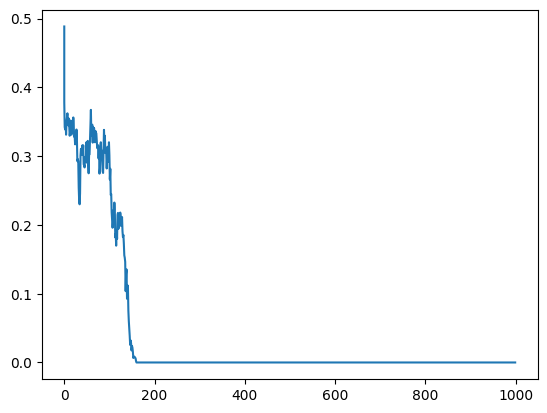

In [92]:
number_of_steps = 1000

data = []
state = initial_state(graph)
data.append({'step': 0, 'rho': rho(graph, state)})

for t in range(number_of_steps):
    current_state = state
    state = evolution_step(graph, current_state)
    data.append({'step': t, 'rho': rho(graph, state)})

df = pd.DataFrame(data)
df.to_csv("csv_outputs/prova.csv")


fig, ax = plt.subplots()
ax.plot(df['step'], df['rho'])